In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("my_cleaned_transactions-Copy1.csv")
del df["Unnamed: 0"]
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit'],
      dtype='object')

In [3]:
# Turn the transaction dat to the datetime value 
df["transaction_date"] = df["transaction_date"].astype("datetime64")

In [4]:
df["transaction_date"].value_counts

<bound method IndexOpsMixin.value_counts of 0       2017-02-25
1       2017-05-21
2       2017-10-16
3       2017-08-31
4       2017-10-01
           ...    
19995   2017-06-24
19996   2017-11-09
19997   2017-04-14
19998   2017-07-03
19999   2017-09-22
Name: transaction_date, Length: 20000, dtype: datetime64[ns]>

In [5]:
# Add the datetime parameters to the transaction-date
df["saleYear"] = df["transaction_date"].dt.year
df["saleMonth"] = df["transaction_date"].dt.month
df["saleDay"] = df["transaction_date"].dt.day
df["saleDayofweek"] = df["transaction_date"].dt.dayofweek
df["saleDayofyear"] = df["transaction_date"].dt.dayofyear

In [6]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'saleYear', 'saleMonth', 'saleDay',
       'saleDayofweek', 'saleDayofyear'],
      dtype='object')

In [9]:
# Analyze  saleMonth vs transaction date
sale_month = df.groupby("saleMonth")["profit"].sum()
sale_month

saleMonth
1     936818.279988
2     879641.320000
3     896339.320000
4     914104.350000
5     921937.330000
6     866120.240000
7     951032.440000
8     979595.080000
9     868663.640000
10    994223.854984
11    936201.010000
12    900521.080000
Name: profit, dtype: float64

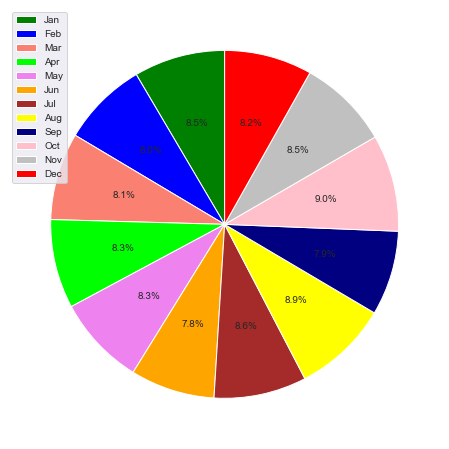

In [10]:
sns.set_style("darkgrid")
x = np.arange(12)
fig, ax = plt.subplots(figsize= (12,8))
colors = ["green","blue","salmon","lime","violet","orange","brown", "yellow","navy","pink","silver","red","grey"]
ax.pie(sale_month, autopct='%1.1f%%', startangle=90, colors = colors );
labels = ["Jan","Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov", "Dec"]
plt.legend(labels, loc = "upper left");

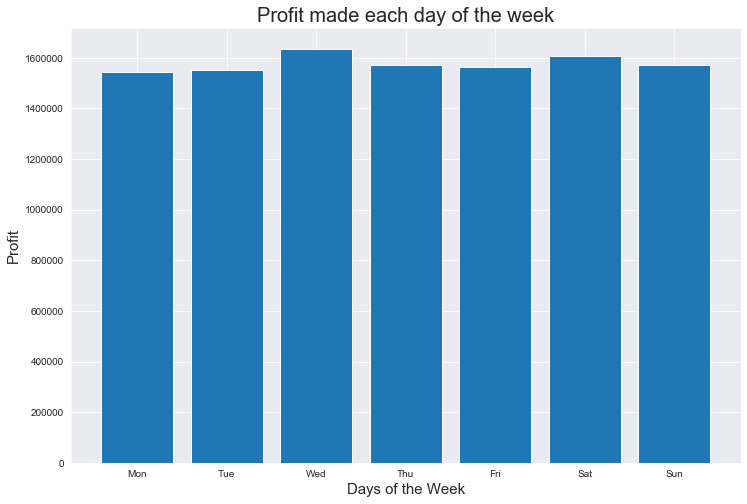

In [63]:
# Analyze  saleDay vs transaction date
sale_week = df.groupby("saleDayofweek")["profit"].sum()
sale_week = np.array(sale_week)
sale_week_dict = {"Mon":sale_week[0],
                  "Tue":sale_week[1],
                  "Wed":sale_week[2],
                  "Thu":sale_week[3],
                  "Fri":sale_week[4],
                  "Sat":sale_week[5],
                  "Sun":sale_week[6]}
fig, ax3 = plt.subplots(figsize = (12,8))
ax3.bar(sale_week_dict.keys(), sale_week_dict.values())
ax3.set_title("Profit made each day of the week", size = 20)
ax3.set_ylabel("Profit", size = 15) 
ax3.set_xlabel("Days of the Week", size = 15);